### Sales Prediction of Big Mart 

In [1]:
# importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading data from the file Sales_data_2 and create the dataframe
df=pd.read_csv("Sales_data_2.csv")
# print the first five rows of the dataframe
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# print the full summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [4]:
# select all columns having number datatype
types = df.select_dtypes(include=['number'])
types.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [5]:
# to find the correlation in the columns
corr =types.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [6]:
# calling describe method
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
# removing null values to avoid errors
df['Outlet_Size'].fillna(value='Medium',inplace=True)
df['Item_Weight'].fillna(value=df['Item_Weight'].mean(),inplace=True)


In [8]:
# delete the columns
df.drop('Item_Identifier',axis=1,inplace=True)
df.drop('Outlet_Identifier',axis=1,inplace=True)
df.drop('Outlet_Establishment_Year',axis=1,inplace=True)


In [9]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.226124,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,9.310000,0.026989,93.826500,834.247400
50%,12.857645,0.053931,143.012800,1794.331000
75%,16.000000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


In [10]:
# counts the missing the values in column 
df.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

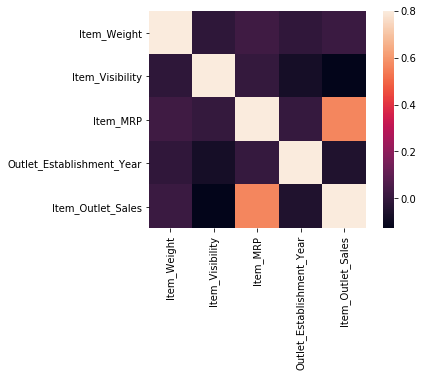

In [11]:
# using the heatmap function from the seaborn package
sns.heatmap(corr, vmax=0.8, square=True)

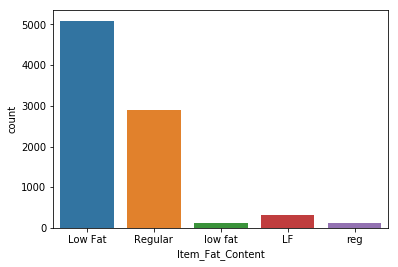

In [12]:
# shows value count
sns.countplot(df.Item_Fat_Content)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

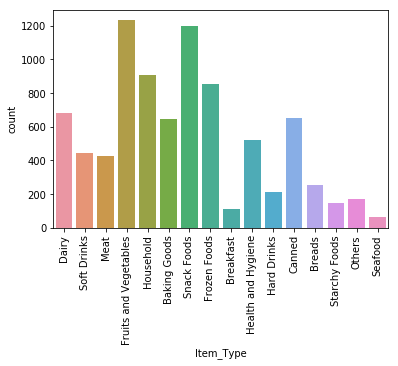

In [13]:
sns.countplot(df.Item_Type)
# rotate the x-axis text to 90 degree so that they don't overlap each other and can be read easily
plt.xticks(rotation=90)

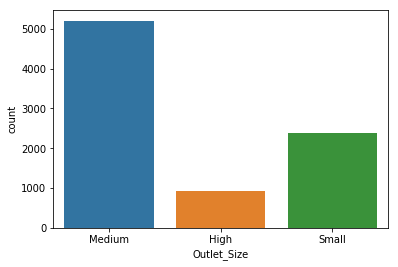

In [14]:
sns.countplot(df.Outlet_Size)

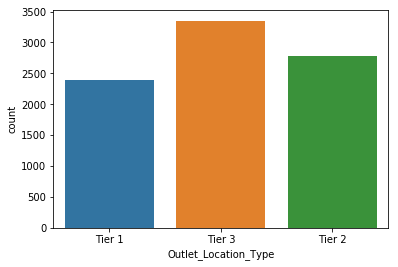

In [15]:
sns.countplot(df.Outlet_Location_Type)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

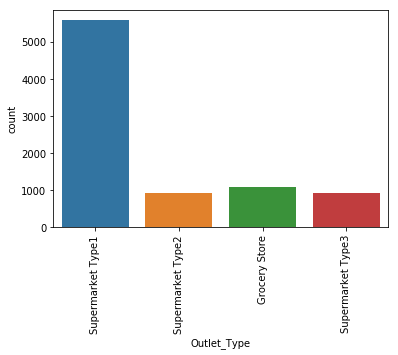

In [16]:
sns.countplot(df.Outlet_Type)
plt.xticks(rotation=90)

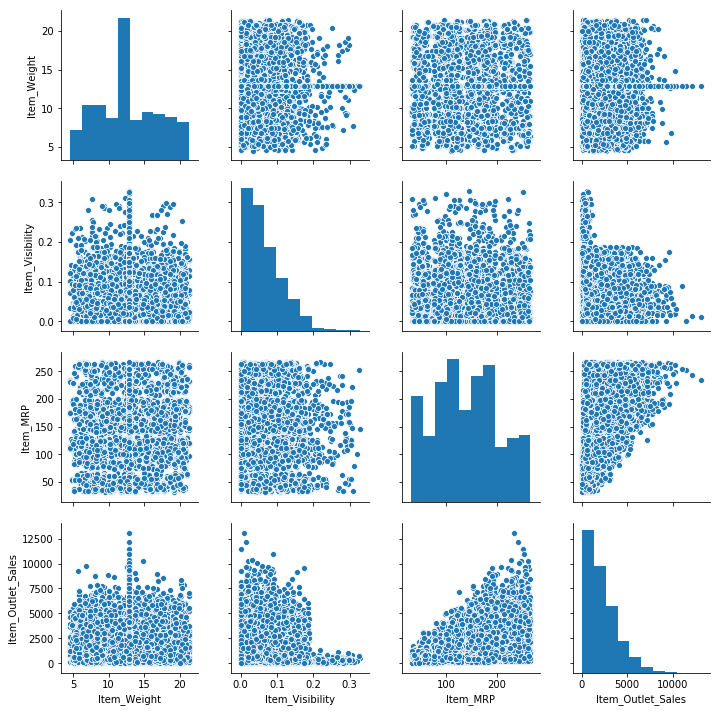

In [17]:
# creating the pairplot
sns.pairplot(data=df)

Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

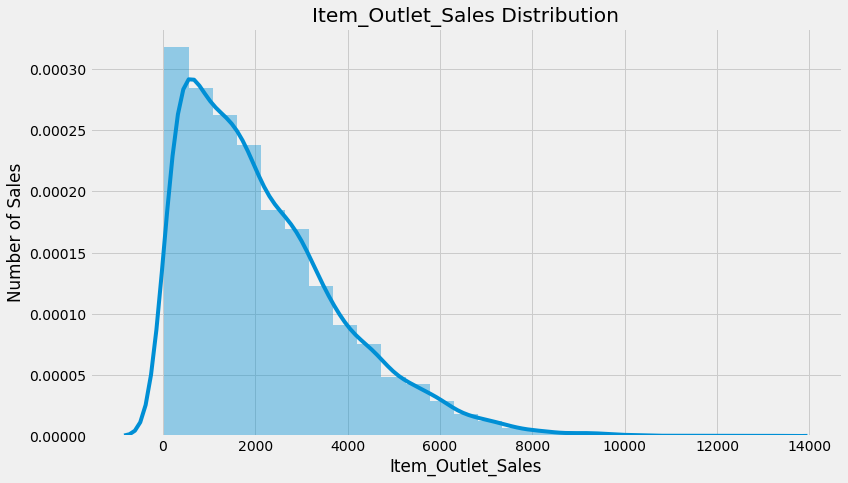

In [18]:
# using distplot function from seaborn to make histogram
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(df.Item_Outlet_Sales, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

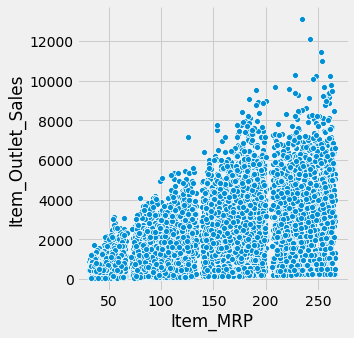

In [19]:
sns.pairplot(x_vars='Item_MRP',y_vars='Item_Outlet_Sales',data=df,height=5.0)


In [20]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


In [21]:
from sklearn.preprocessing import Imputer

In [22]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [23]:
# using iloc function to extract the rows and columns
X=df.iloc[:,:-1].values
y=df.iloc[:,8]

In [24]:
# labeklEncoder and OneHotEncoder function used to convert the categorical or text data into number
lr_X=LabelEncoder()
X[:, 1]=lr_X.fit_transform(X[:, 1])
oht=OneHotEncoder(categorical_features=[1])

In [25]:
X[:,1]

array([1, 2, 1, ..., 1, 2, 1], dtype=object)

In [26]:
# fit the converted data into the model
X[:, 3]=lr_X.fit_transform(X[:, 3])
oht=OneHotEncoder(categorical_features=[1])

In [27]:
X[:, 5]=lr_X.fit_transform(X[:, 5])
oht=OneHotEncoder(categorical_features=[5])

In [28]:
X[:, 6]=lr_X.fit_transform(X[:, 6])
oht=OneHotEncoder(categorical_features=[6])

In [29]:
X[:, 7]=lr_X.fit_transform(X[:, 7])
oht=OneHotEncoder(categorical_features=[7])

In [30]:
X

array([[9.3, 1, 0.016047301, ..., 1, 0, 1],
       [5.92, 2, 0.019278216, ..., 1, 2, 2],
       [17.5, 1, 0.016760075, ..., 1, 0, 1],
       ...,
       [10.6, 1, 0.035186271, ..., 2, 1, 1],
       [7.21, 2, 0.145220646, ..., 1, 2, 2],
       [14.8, 1, 0.04487828, ..., 2, 0, 1]], dtype=object)

In [31]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
5        556.6088
6        343.5528
7       4022.7636
8       1076.5986
9       4710.5350
10      1516.0266
11      2187.1530
12      1589.2646
13      2145.2076
14      1977.4260
15      1547.3192
16      1621.8888
17       718.3982
18      2303.6680
19      2748.4224
20      3775.0860
21      4064.0432
22      1587.2672
23       214.3876
24      4078.0250
25       838.9080
26      1065.2800
27       308.9312
28       178.4344
29       125.8362
          ...    
8493    4727.1800
8494    1637.8680
8495    4314.3840
8496    3715.1640
8497    2247.0750
8498    1601.2490
8499    2976.1260
8500    1907.5170
8501    1508.0370
8502    3020.0688
8503    3392.9168
8504    4138.6128
8505    2117.2440
8506    3944.8650
8507     515.9950
8508    2587.9646
8509     424.7804
8510    7182.6504
8511    4207.8560
8512    2479.4392
8513     595.2252
8514     468.7232
8515    1571.2880
8516     858.8820
8517    36

In [32]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

### Multiple Linear Regression Model

In [33]:
# creating linear regression object and train the model using training sets
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
# predict using linear model
y_pred=lr.predict(X_test)
y_pred

array([1102.62545034,  600.55584058, 1034.56149571, ..., 1305.33352304,
       1993.04763648, 3309.4376348 ])

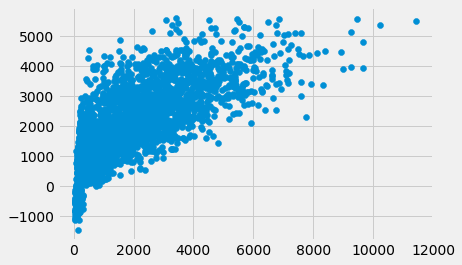

In [35]:
# plotting residual error in test data
plt.scatter(y_test,y_pred)

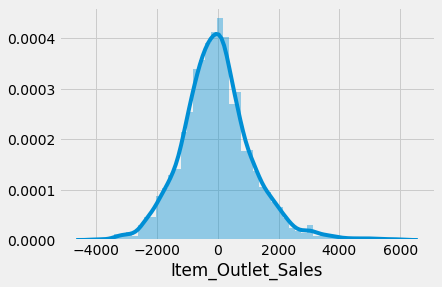

In [36]:
# using distplot function to make histogram 
import seaborn as sns
sns.distplot((y_test-y_pred))

In [37]:
from sklearn import metrics

In [38]:
# printing the error value in our data
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

874.3627676763202
1369332.321357929
1170.1847381323723


In [39]:
# accuracy of predictive data
print(metrics.explained_variance_score(y_test,y_pred))

0.5112370495861718


### Random Forest Regression Model

In [40]:
# creating random forest regression object and train the model using training sets
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=100, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [41]:
# predict regression target for x
rf_pred=rf.predict(X_test)

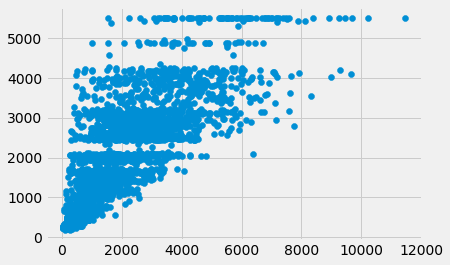

In [42]:
# plotting residual error in test data 
plt.scatter(y_test,rf_pred)

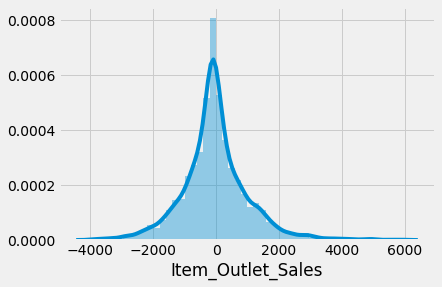

In [43]:
# using distplot function to make histogram of test data after prediction
import seaborn as sns
sns.distplot((y_test-rf_pred))

In [44]:
# printing the error value in our data
print(metrics.mean_absolute_error(y_test,rf_pred))
print(metrics.mean_squared_error(y_test,rf_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,rf_pred)))

741.2543263096287
1122178.779474672
1059.3294008355815


In [45]:
# accuracy of our predictive data
print(metrics.explained_variance_score(y_test,rf_pred))

0.5997127603425674


### Decision Tree Regression Model

In [46]:
from sklearn.tree import DecisionTreeRegressor


In [47]:
# creating decision tree regression object
tree = DecisionTreeRegressor( random_state = 100,max_depth=6, min_samples_leaf=6)

In [48]:
# train the model using training sets
tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=6,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=100, splitter='best')

In [49]:
# predict regression value for x
tree_pred = tree.predict(X_test)

In [50]:
# printing the error value in our data
print(metrics.mean_absolute_error(y_test,tree_pred))
print(metrics.mean_squared_error(y_test,tree_pred))
print(metrics.explained_variance_score(y_test,tree_pred))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_test,tree_pred)))

744.5243451658768
1140628.152741042
0.5932788609630549
RMSE : 1068


In [51]:
# accuracy of our predictive data
tree_accuracy = round(tree.score(X_train,y_train),2)
tree_accuracy

0.61

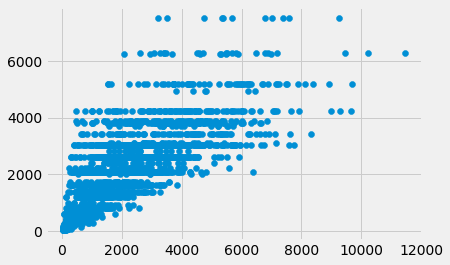

In [52]:
# plotting residual error in test data 
plt.scatter(y_test,tree_pred)

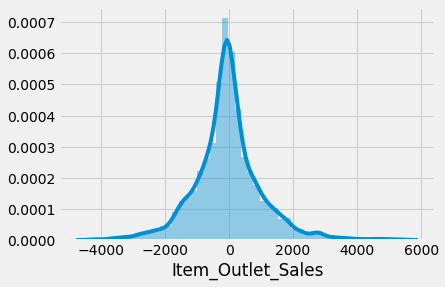

In [53]:
# using distplot function to make histogram of test data after prediction
sns.distplot((y_test-tree_pred))